# FUNNEL ANALYSIS

## READ DATA

In [1]:
#get basic information about each table                                                                   
import pandas                                                                                             
import seaborn as sns                                                                                     
import matplotlib.pyplot as plt                                                                           
home_page=pandas.read_csv("/Users/apple/Desktop/takehomechallenges/Funnel_Analysis/home_page_table.csv")  
print(home_page.head(5))                                                                                  

   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page


In [3]:
confirmation=pandas.read_csv("/Users/apple/Desktop/takehomechallenges/Funnel_Analysis/payment_confirmation_table.csv") 
print(confirmation.head(5))                                                                                            

   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


In [4]:
payment_page=pandas.read_csv("/Users/apple/Desktop/takehomechallenges/Funnel_Analysis/payment_page_table.csv")   
print(payment_page.head(5))                                                                                      

   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page


In [5]:
search=pandas.read_csv("/Users/apple/Desktop/takehomechallenges/Funnel_Analysis/search_page_table.csv")       
print(search.head(5))                                                                                         

   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page


In [28]:
user_table=pandas.read_csv("/Users/apple/Desktop/takehomechallenges/Funnel_Analysis/user_table.csv")    
print(user_table.head(5)) 
user_table.describe(include="all")

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male


,user_id,date,device,sex
count,90400.000000,90400,90400,90400
unique,NaN,120,2,2
top,NaN,2015-02-08,Desktop,Male
freq,NaN,877,60200,45325
mean,498709.683473,NaN,NaN,NaN
std,289040.674085,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN
25%,247978.750000,NaN,NaN,NaN
50%,498267.000000,NaN,NaN,NaN
75%,749789.250000,NaN,NaN,NaN


In [7]:
print(home_page.shape,confirmation.shape,payment_page.shape,search.shape,user_table.shape)     

(90400, 2) (452, 2) (6030, 2) (45200, 2) (90400, 4)


## DATA MANIPULATION

In [8]:
#merge multiple table into a big table                                                                    
df=pandas.merge(left=user_table,right=home_page,how="left",on="user_id")                                  
df=pandas.merge(left=df,right=confirmation,how="left",on="user_id",suffixes=("_home","_confirmation"))    
df=pandas.merge(left=df,right=payment_page,how="left",on="user_id")                                       
df=pandas.merge(left=df,right=search,how="left",on="user_id",suffixes=("_payment_page","_search"))        
print(df.describe(include="all"))                                                                         
                                                                                                          

              user_id        date   device    sex  page_home  \
count    90400.000000       90400    90400  90400      90400   
unique            NaN         120        2      2          1   
top               NaN  2015-02-08  Desktop   Male  home_page   
freq              NaN         877    60200  45325      90400   
mean    498709.683473         NaN      NaN    NaN        NaN   
std     289040.674085         NaN      NaN    NaN        NaN   
min         17.000000         NaN      NaN    NaN        NaN   
25%     247978.750000         NaN      NaN    NaN        NaN   
50%     498267.000000         NaN      NaN    NaN        NaN   
75%     749789.250000         NaN      NaN    NaN        NaN   
max     999979.000000         NaN      NaN    NaN        NaN   

                page_confirmation page_payment_page  page_search  
count                         452              6030        45200  
unique                          1                 1            1  
top     payment_confirmation_p

In [10]:
#get OVERALL conversion ratio                                                                                                                                                             
conver_ratio=1-pandas.DataFrame(df.isnull().sum())/len(df)                                    
df_final=conver_ratio.reset_index().rename(columns={'index':'variable',0:"conversion"})[4:]  
df_final.head(5)

,variable,conversion
4,page_home,1.000000
5,page_confirmation,0.005000
6,page_payment_page,0.066704
7,page_search,0.500000


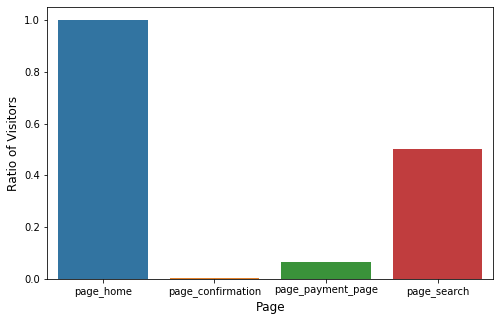

In [11]:
#visualization                                                             
fig, ax = plt.subplots(figsize=(8, 5))                                     
sns.barplot(x='variable', y='conversion', data=df_final,ax=ax)             
ax.set_xlabel('Page', fontsize=12)                                         
ax.set_ylabel('Ratio of Visitors', fontsize=12)                            
plt.show()                                                                 

## conversion rate for each pages

In [16]:
def conversion_rate(df):
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment_page'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment_page'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

### 1.overall

In [22]:
rates = conversion_rate(df)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
print(maps)
overall_conv = pandas.DataFrame(maps, columns=['Page', 'Conversion Rate'])
print(overall_conv)

{'Page': ['home', 'search', 'payment'], 'Conversion Rate': [0.5, 0.13340707964601772, 0.07495854063018237]}
      Page  Conversion Rate
0     home         0.500000
1   search         0.133407
2  payment         0.074959


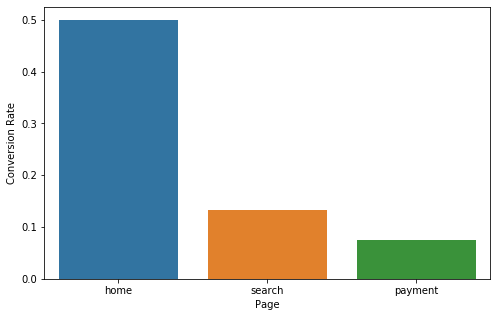

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

### 2. based on devices

In [27]:
df_desktop=df[df["device"]=="Desktop"]
df_desktop.describe(include="all")

,user_id,date,device,sex,page_home,page_confirmation,page_payment_page,page_search
count,60200.000000,60200,60200,60200,60200,150,3010,30100
unique,NaN,120,1,2,1,1,1,1
top,NaN,2015-02-08,Desktop,Male,home_page,payment_confirmation_page,payment_page,search_page
freq,NaN,585,60200,30203,60200,150,3010,30100
mean,498484.582492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,289036.870377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,247371.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,498406.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,748622.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
desktop_rates = conversion_rate(df_desktop)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': desktop_rates}
print(maps)
overall_conv_desktop = pandas.DataFrame(maps, columns=['Page', 'Conversion Rate'])
print(overall_conv_desktop)

{'Page': ['home', 'search', 'payment'], 'Conversion Rate': [0.5, 0.09999999999999998, 0.04983388704318936]}
      Page  Conversion Rate
0     home         0.500000
1   search         0.100000
2  payment         0.049834


In [47]:
df_mobile=df[df["device"]=="Mobile"]
df_mobile.describe(include="all")

,user_id,date,device,sex,page_home,page_confirmation,page_payment_page,page_search
count,30200.000000,30200,30200,30200,30200,302,3020,15100
unique,NaN,120,1,2,1,1,1,1
top,NaN,2015-02-08,Mobile,Male,home_page,payment_confirmation_page,payment_page,search_page
freq,NaN,292,30200,15122,30200,302,3020,15100
mean,499158.394702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,289052.518706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,249389.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,497936.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,752326.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
mobile_rates = conversion_rate(df_mobile)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': mobile_rates}
print(maps)
overall_conv_mobile = pandas.DataFrame(maps, columns=['Page', 'Conversion Rate'])
print(overall_conv_mobile)

{'Page': ['home', 'search', 'payment'], 'Conversion Rate': [0.5, 0.19999999999999996, 0.09999999999999998]}
      Page  Conversion Rate
0     home              0.5
1   search              0.2
2  payment              0.1


In [49]:
overall_device=pandas.merge(left=overall_conv_desktop,right=overall_conv_mobile,how="inner",on="Page")
overall_device.rename(columns={'Conversion Rate_x':'desktop','Conversion Rate_y':'mobile'})

,Page,desktop,mobile
0,home,0.500000,0.5
1,search,0.100000,0.2
2,payment,0.049834,0.1


In [52]:

# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desktop_rates + mobile_rates}
device_conv = pandas.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])
print(maps)
print(device_conv)

{'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 'Conversion Rate': [0.5, 0.09999999999999998, 0.04983388704318936, 0.5, 0.19999999999999996, 0.09999999999999998]}
      Page   Device  Conversion Rate
0     home  Desktop         0.500000
1   search  Desktop         0.100000
2  payment  Desktop         0.049834
3     home   Mobile         0.500000
4   search   Mobile         0.200000
5  payment   Mobile         0.100000


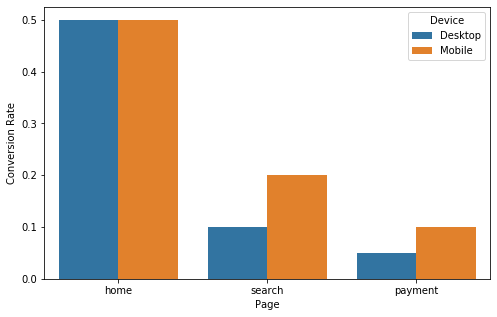

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

#for the home page conversion, mobile and desktop have similar conversion rate. However, for the search page and payment, the mobile conversion rate is higher than desktop conversion rate.

### 3. based on sex


In [58]:
male_rates=conversion_rate(df[df['sex']=='Male'])
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': male_rates}
overall_conv_male = pandas.DataFrame(maps, columns=['Page', 'Conversion Rate'])
print(overall_conv_male)

      Page  Conversion Rate
0     home         0.496944
1   search         0.130083
2  payment         0.072014


In [59]:
female_rates=conversion_rate(df[df['sex']=='Female'])
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': male_rates}
overall_conv_female = pandas.DataFrame(maps, columns=['Page', 'Conversion Rate'])
print(overall_conv_female)

      Page  Conversion Rate
0     home         0.496944
1   search         0.130083
2  payment         0.072014


In [60]:
df_final_sex=pandas.merge(left=overall_conv_male,right=overall_conv_female,how="inner",on="Page")
df_final_sex

,Page,Conversion Rate_x,Conversion Rate_y
0,home,0.496944,0.496944
1,search,0.130083,0.130083
2,payment,0.072014,0.072014


In [63]:
maps={'Page':['home','search','payment','home','search','payment'],
      'sex':['male','male','male','female','female','female'],
      'conversion rate':male_rates+female_rates}
sex_conv=pandas.DataFrame(maps,columns=['Page','sex','conversion rate'])
sex_conv

,Page,sex,conversion rate
0,home,male,0.496944
1,search,male,0.130083
2,payment,male,0.072014
3,home,female,0.503073
4,search,female,0.136708
5,payment,female,0.077742


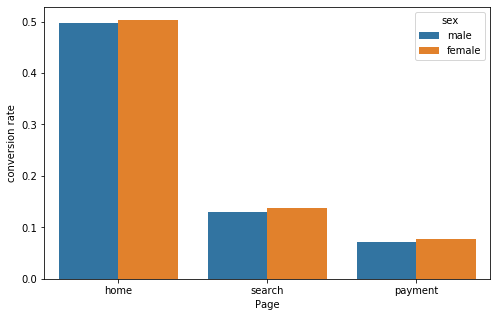

In [66]:
fig, ax=plt.subplots(figsize=(8,5))
sns.barplot(x='Page',y='conversion rate',data=sex_conv,hue='sex',ax=ax)
plt.show()

#female conversion rate is a little bit higher than male, so the product team could focus on male segment to increase product characteristics that can attract male consumers. 